<a href="https://colab.research.google.com/github/cr1085/machine_learning_clasification/blob/main/Cancer_de_Mama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explicación del codigo:
*    Librerías utilizadas en la codificación
1.   numpy/pandas: Manipulación de datos.
2.   matplotlib/seaborn:Visualización.
3.   sickit-learn:Machine learning (modelo de    procesamiento y de clasificación binaria)
4. Dataset: usamos el dataset de cáncer de mama de wisconsin
*   30 características numéricas
*   variables objetivo binaria (0:maligno, 1: benigno)
## Visualizaciones incluidas
1.   Distribuciòn de clase objetivo
2.   Elemento de lista
3.   Matriz de correlaciòn entre caracteristicas(Top 10)
### Modelo de Machine learning
-**Randon Forest:** Algorismo potente de para clasificaciòn
-**Procesamiento:** Escalado estàndar de caracteristicas
-**Evaluaciòn:** Reporte de clasificaciòn, precisiòn, matriz de confusiòn.
# **5. Còmo ejecutarlo**
### Copia este codigo jupyter notebook o script.py
### Asegùrate de tener instaladas las librerìas:
```bash
  pib istall numpy
  pib istall pandas
  pib istall matploblib
  pib istall seaborn
  pib istall sickit-learn
  ```
- Copia y pega este codigo en tu terminal, o ejecutar celdas por celdas en tu jupiter o todo el script
#**6. Posibles mejoras**

-Ajustes hipermarametros con GripchearCV
-Validaciòn cruzada
-Prueba con otros algoritmos(SVM,XGBoost,etc.)
-Analisis màs detallado de caracteristicas

**Este còdigo proporciona un flujo completo de ML con vizualizaciones profesionales listas para presentarnes e informes.**
















======1. Cargando y explorando los datos ===

Primeras 5 filas de dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal d

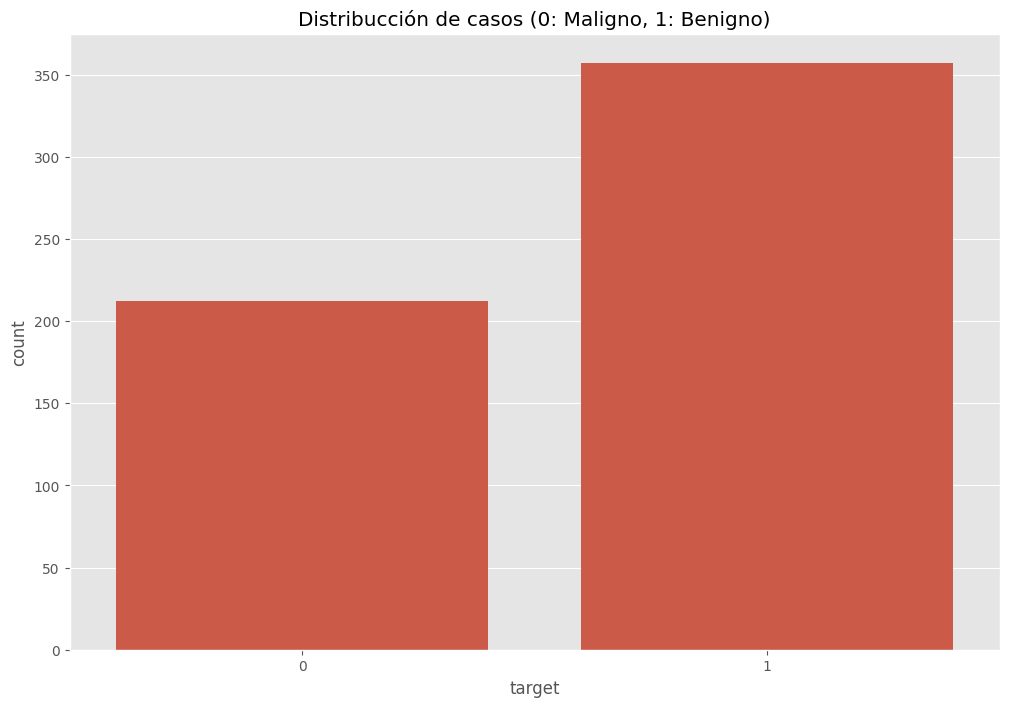

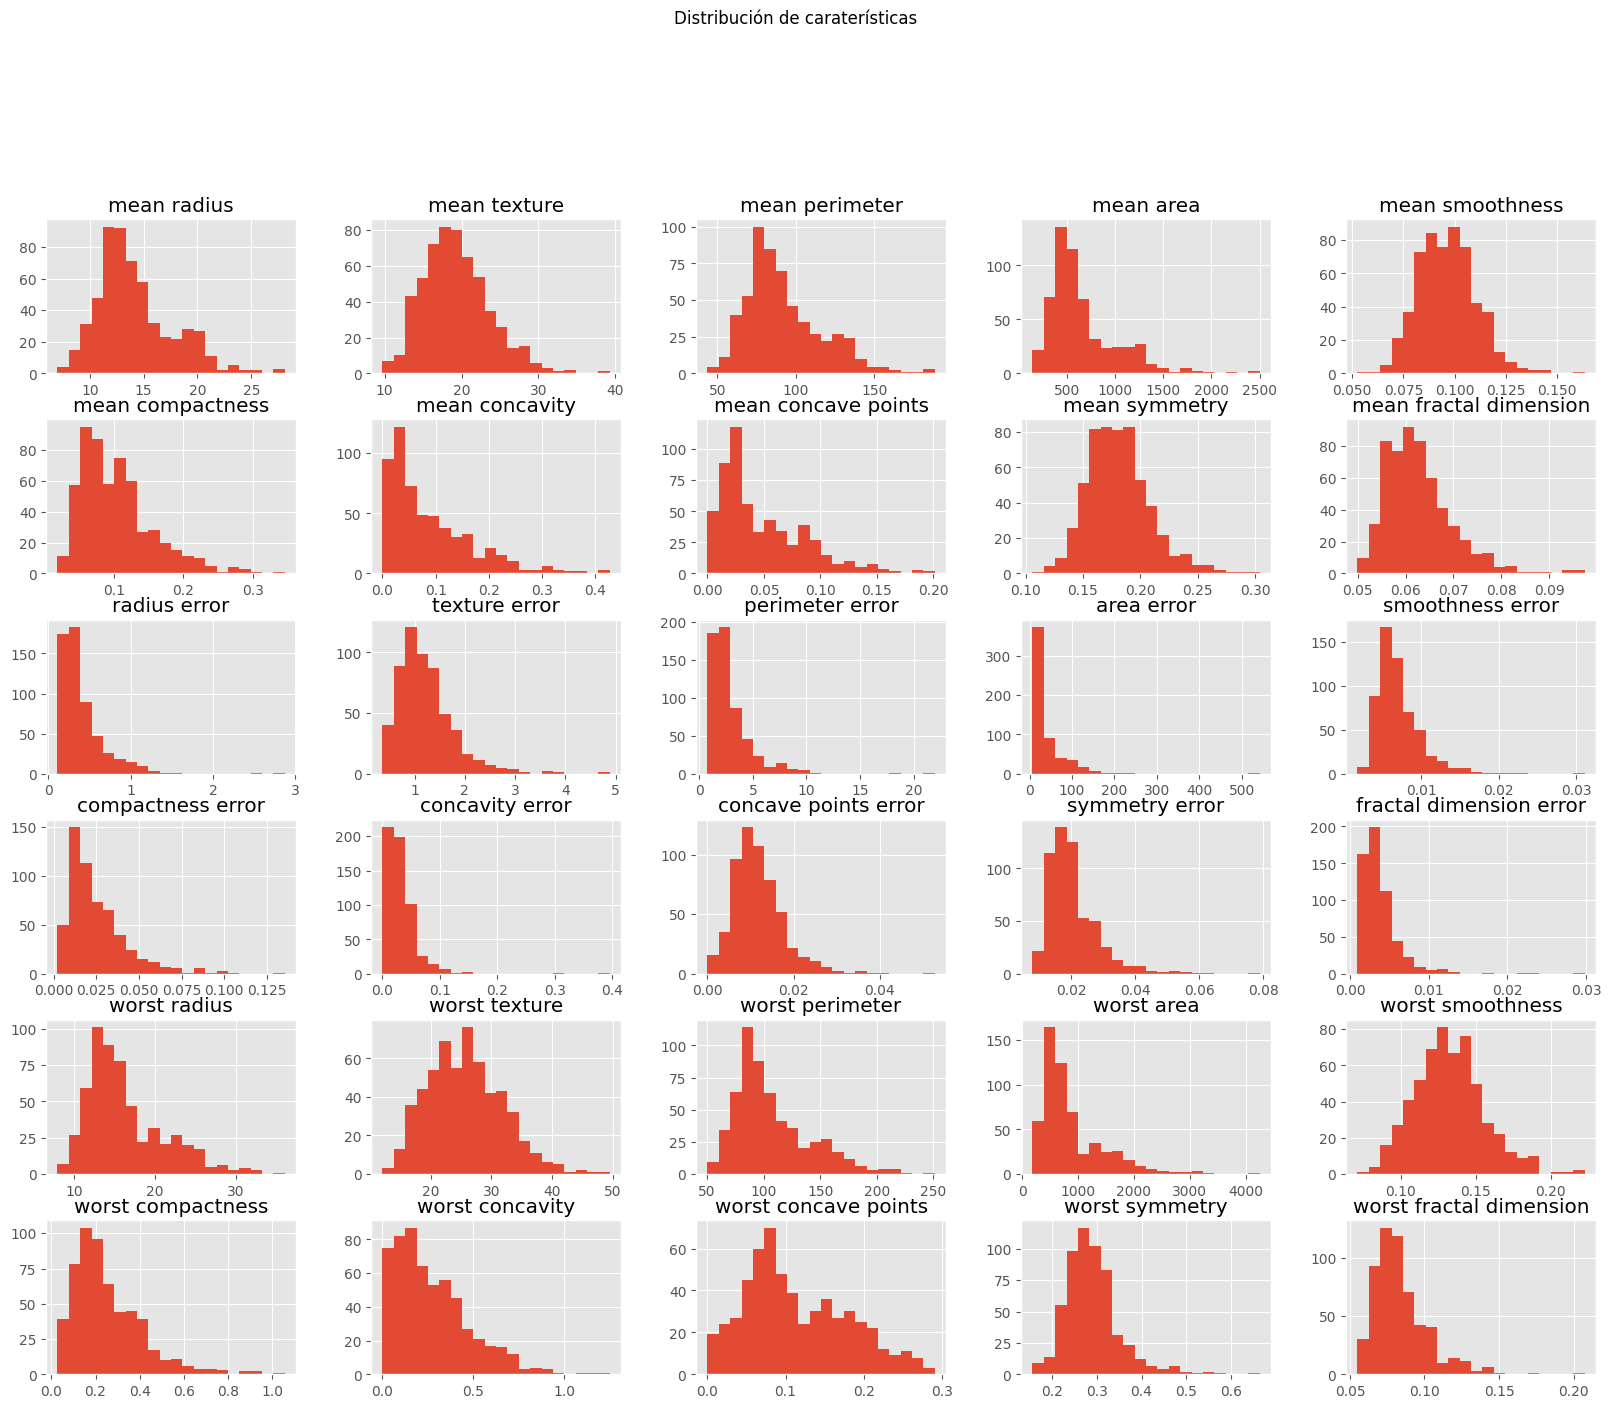

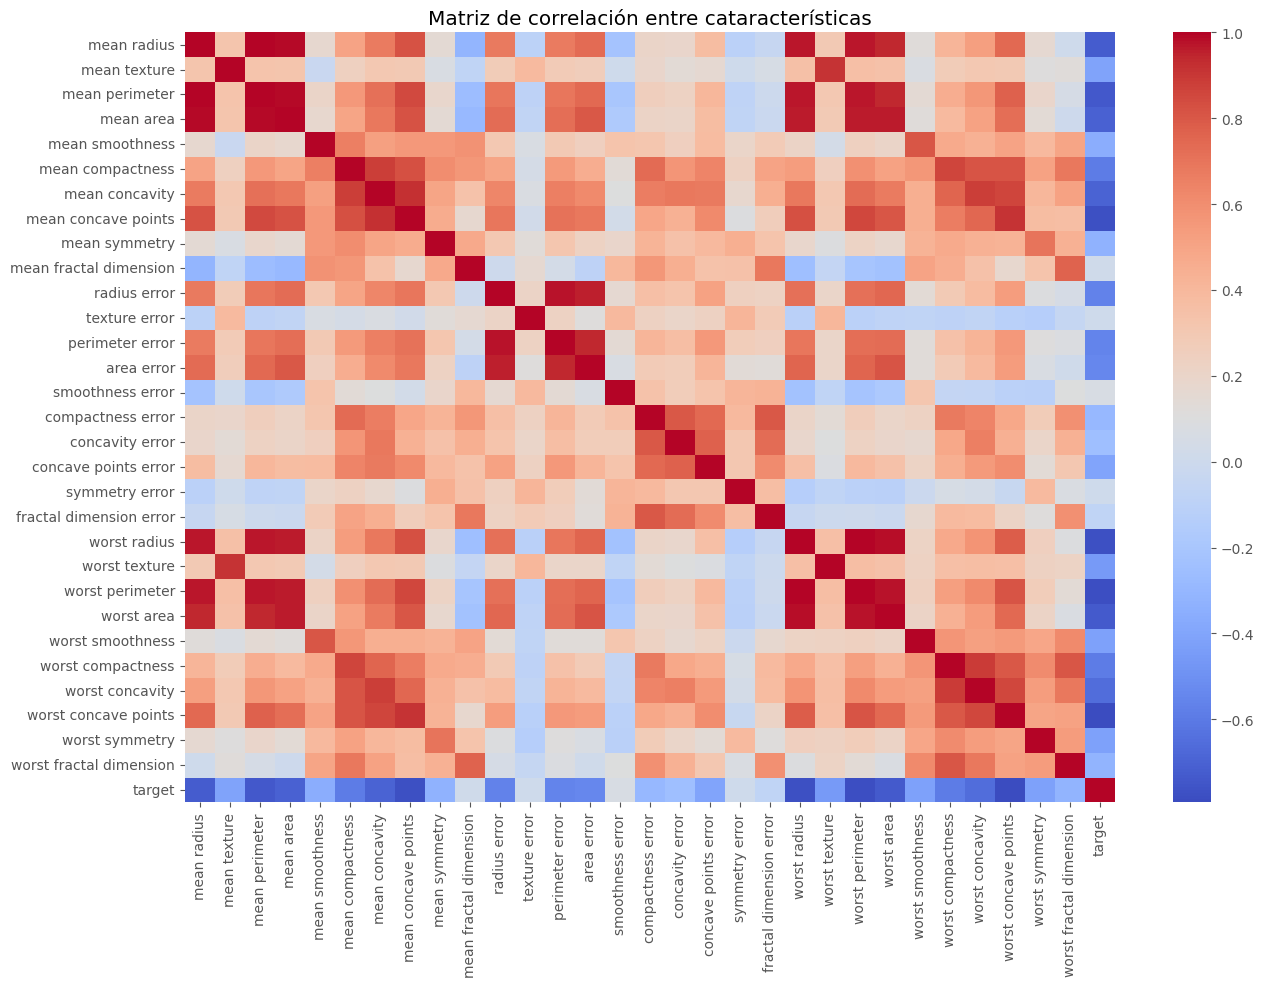


===3. Preprocesamiento de datos===
===SALIDAS===

Forma de los datos de entrenamiento: (398, 30)
Forma de los datos de prueba: (171, 30)

===4. Entrenamiento del modelo===

===5. Evaluación del modelo===

==Reporte de clasificación==:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Matriz de confusión:


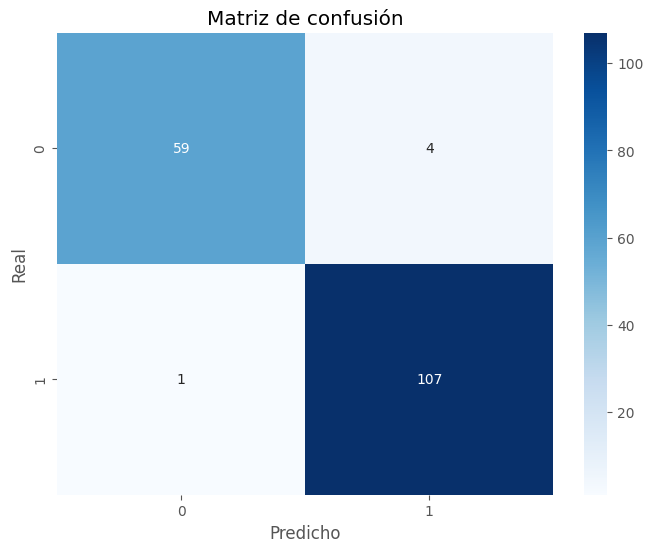


Precisión del modelo: 0.97

===6. Importancia de las características====


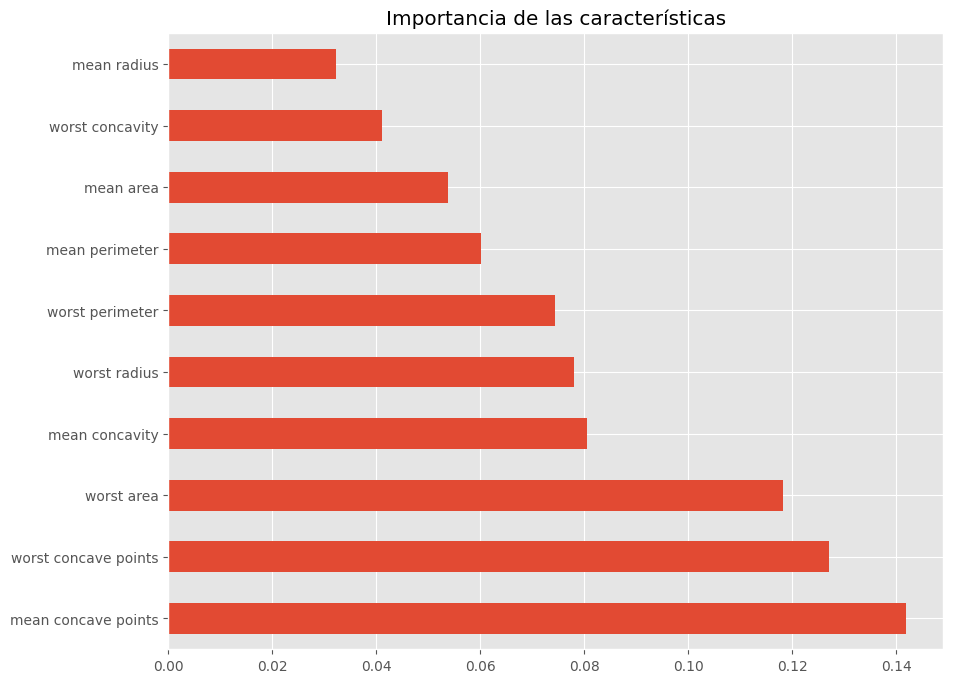


===7. Predicción de ejemplo ===

Predicción para muestra de ejemplo o de prueba: Benigno
Etiqueta real: Benigno


In [ ]:
# importando las librerías escenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer
# -----------------------------
# Configurar estilos de los gráficos
plt.style.use('ggplot')
%matplotlib inline
# -----------------------------
# 1. cargar y explorar los datos
print("======1. Cargando y explorando los datos ===")
data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("\nPrimeras 5 filas de dataset:")
print(df.head())
print("\nInformación del dataset")
print(df.info())
print('\nEstadísticas descriptivas')
print(df.describe())
# Visualización de los datos
print('\n===2. Visualización de datos===')
plt.figure(figsize=(12,8))
sns.countplot(x='target', data=df)
plt.title('Distribucción de casos (0: Maligno, 1: Benigno)')
plt.show()
# Histogramas de las carcaterísticas
df.drop('target', axis=1).hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de caraterísticas', y=1.02)
plt.show()
# Matriz de correlacion
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación entre cataracterísticas')
plt.show()
# Preprocesamiento de datos
print('\n===3. Preprocesamiento de datos===')
x=df.drop('target', axis=1)
y=df['target']
# Divir en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Escalar caracteristicas
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("===SALIDAS===")
print(f"\nForma de los datos de entrenamiento: {x_train.shape}")
print(f"Forma de los datos de prueba: {x_test.shape}")
# Entrenamiento del modelo
print('\n===4. Entrenamiento del modelo===')
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
# Evaluación del modelo
print("\n===5. Evaluación del modelo===")
y_pred = model.predict(x_test)
print("\n==Reporte de clasificación==:")
print(classification_report(y_test, y_pred))
# ===================================================
# Las matrices de confusión son herramientas esenciales en el
# aprendizaje automático, especialmente para evaluar el rendimiento
# de modelos de clasificación. Permiten visualizar y analizar la precisión-
# de las predicciones, identificando errores comunes y áreas donde el
# modelo necesita mejoras.
print("\nMatriz de confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()
# ===================================
print(f"\nPrecisión del modelo: {accuracy_score(y_test,y_pred):.2f}")
# Importancia de las características
print("\n===6. Importancia de las características====")
feature_importance = pd.Series(model.feature_importances_,index=data.feature_names)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 8))
plt.title('Importancia de las características')
plt.show()
# Predicción de ejemplo
print('\n===7. Predicción de ejemplo ===')
sample = x_test[0].reshape(1,-1)
prediccion=model.predict(sample)
print(f"\nPredicción para muestra de ejemplo o de prueba: {'Benigno' if prediccion[0] == 1 else 'Malingo'}")
print(f"Etiqueta real: {'Benigno' if y_test.iloc[0] == 1 else 'Maligno'}")
#



